In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten ,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import pandas as pd
import cv2

In [4]:
main_dir =r'Face_Mask_Dataset'
train_dir = os.path.join(main_dir, 'Train')
valid_dir =os.path.join(main_dir, 'Validation')
test_dir =os.path.join(main_dir, 'Test')



In [5]:
train_mask_dir =os.path.join(train_dir, 'WithMask')
train_nomask_dir =os.path.join(train_dir, 'WithoutMask')


In [6]:
print(train_dir)

Face_Mask_Dataset\Train


In [7]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])



['10.png', '100.png', '1004.png', '1005.png', '1006.png', '1007.png', '1008.png', '1011.png', '1012.png', '1018.png']
['10.png', '100.png', '1004.png', '1005.png', '1006.png', '1007.png', '1008.png', '1009.png', '101.png', '1010.png']


In [8]:
pd.DataFrame([len(train_mask_names),len(train_nomask_names)],columns=['Number'],index=['with_mask','without_mask'])

,Number
with_mask,5000
without_mask,5000


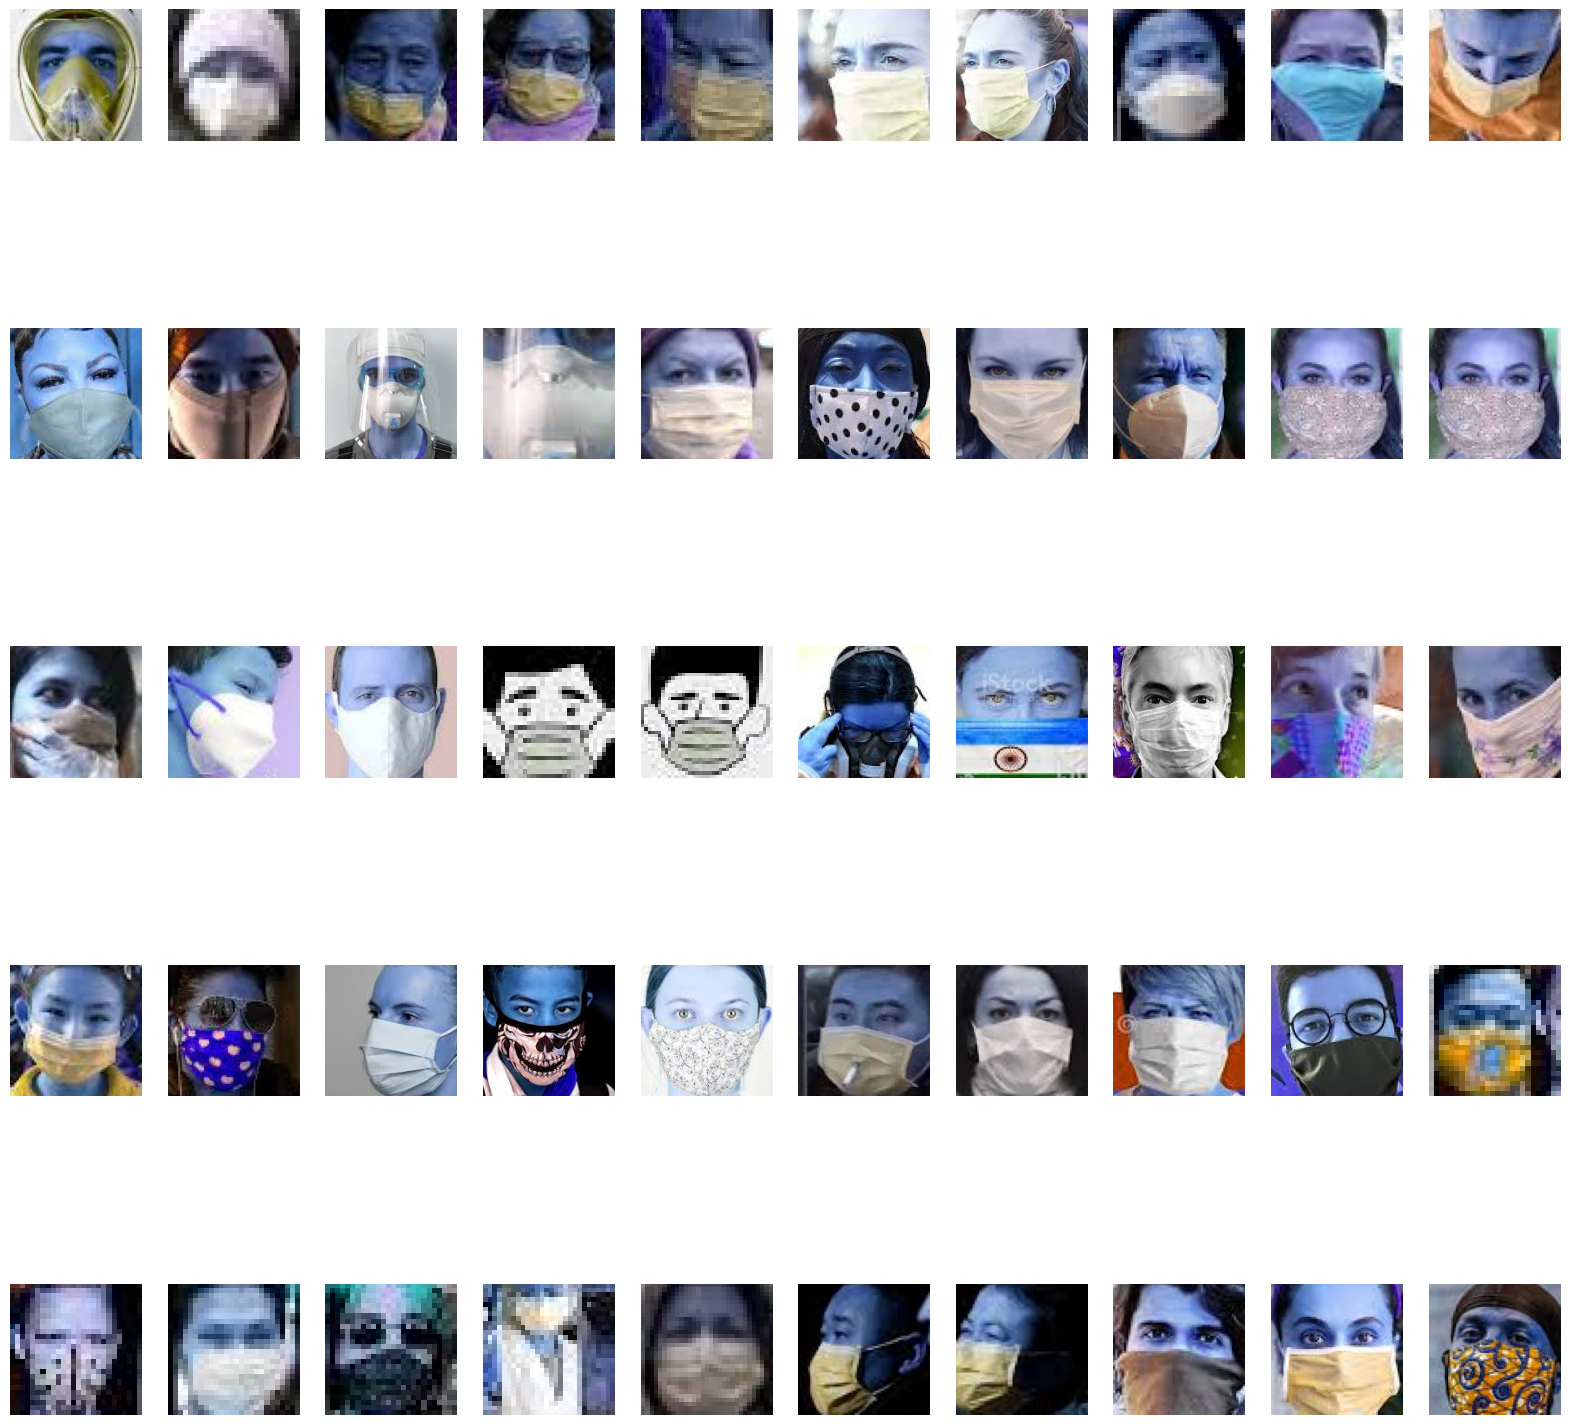

In [9]:
#Show With Mask Image
i=1
plt.figure(figsize=(20,20))
for img in train_mask_names:
    if i==51:
        break
    plt.subplot(5,10,i)
    img_arr=cv2.imread(os.path.join('Face_Mask_Dataset\Train\WithMask',img))
    plt.imshow(img_arr)
    i+=1
    plt.axis('off')

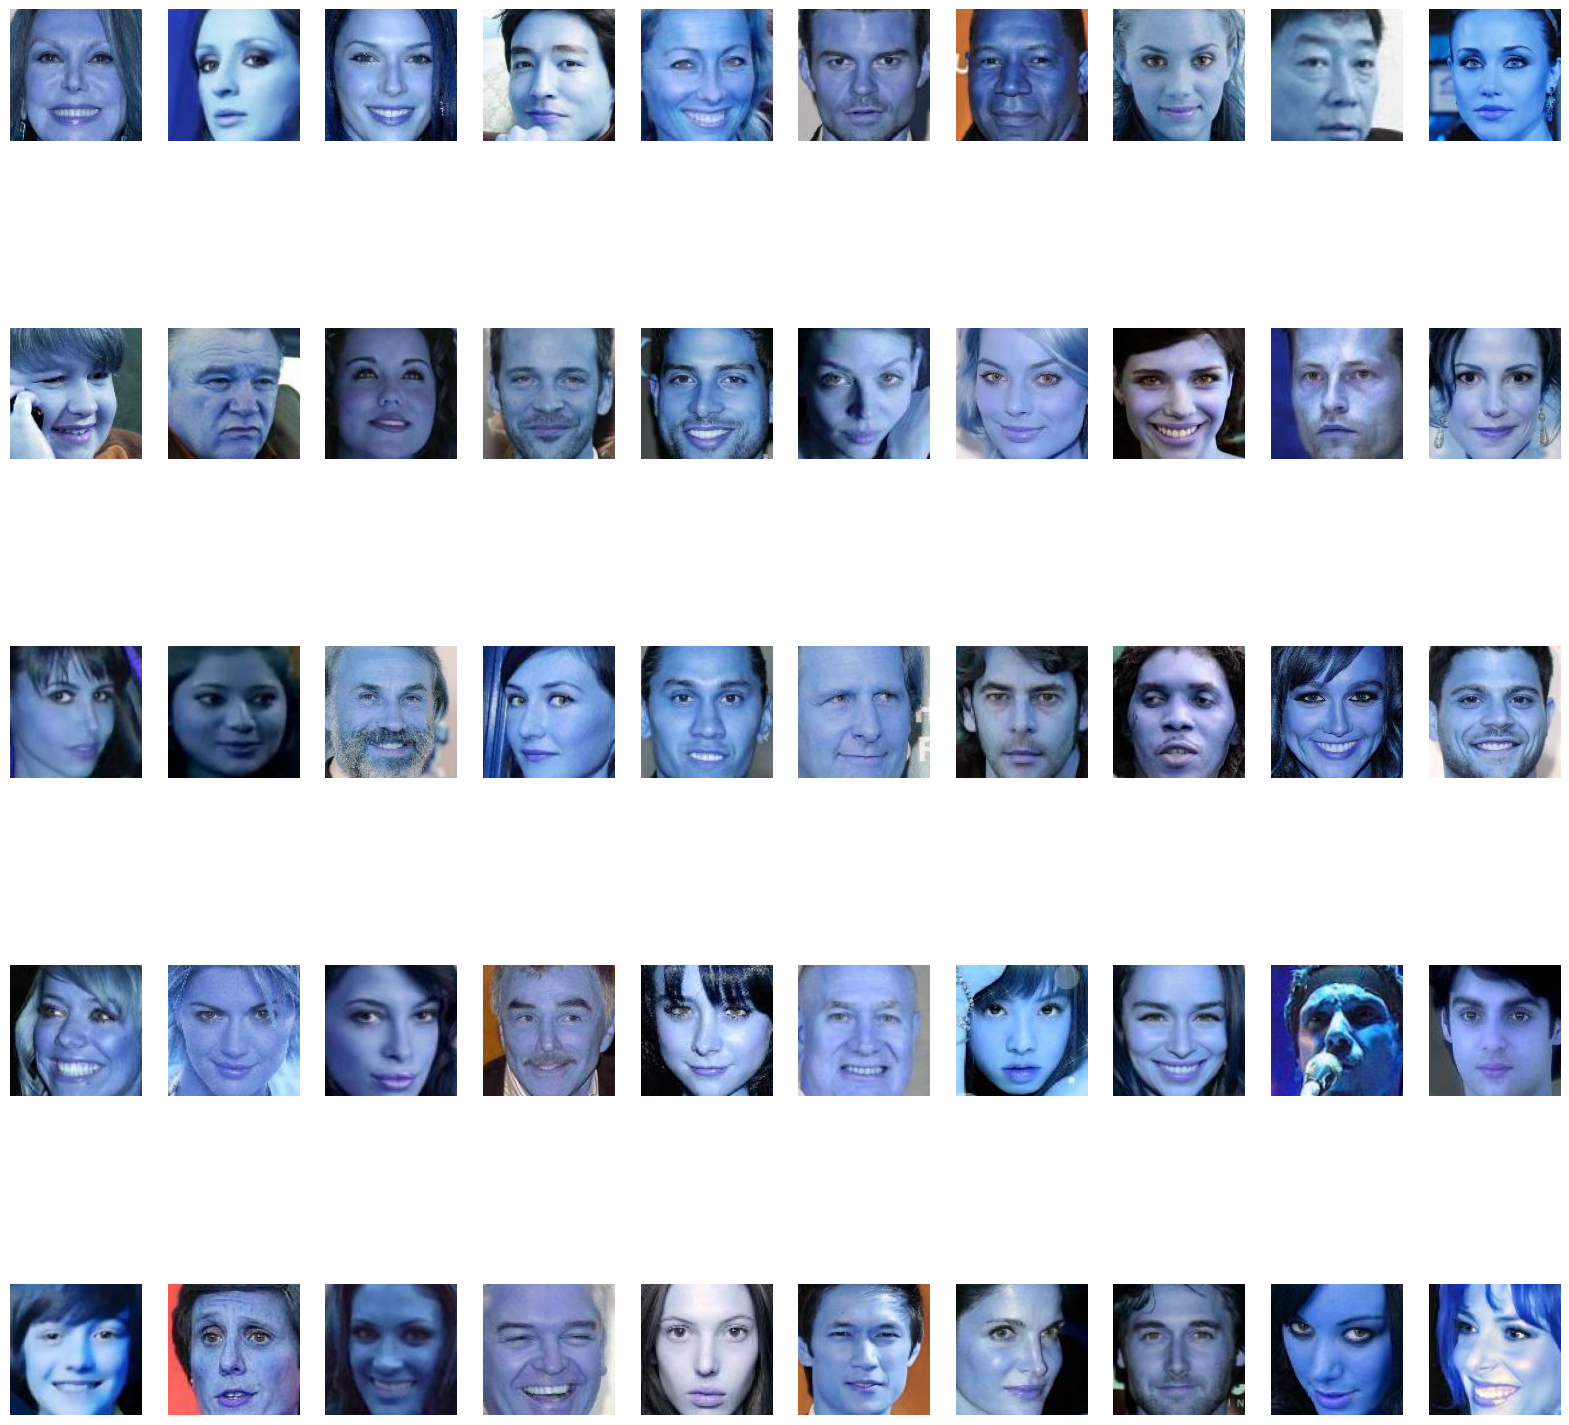

In [72]:
#Show With Mask Image
i=1
plt.figure(figsize=(20,20))
for img in train_nomask_names:
    if i==51:
        break
    plt.subplot(5,10,i)
    img_arr=cv2.imread(os.path.join('Face_Mask_Dataset\Train\WithoutMask',img))
    plt.imshow(img_arr)
    i+=1
    plt.axis('off')

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255, # normalizing the images
                                   zoom_range =0.2, # zoom images 20%
                                   rotation_range = 40, 
                                   horizontal_flip = True # random images can be flipped
                                   )
# normalizing the test and validation sets
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# flow_from_directory takes a path frpm directory and generates batches of augumented data sets

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150,150), # uniform the image size
                                                    batch_size =32, # for each time batch size
                                                    class_mode ='binary'
                                                    )
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                    target_size=(150,150),
                                                    batch_size =32,
                                                    class_mode ="binary"
                                                    )
valid_generator = validation_datagen.flow_from_directory(valid_dir, 
                                                    target_size=(150,150),
                                                    batch_size =32,
                                                    class_mode ="binary" # withmask:0 and withoutmask:1
                                                    )

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [11]:
train_generator.class_indices


{'WithMask': 0, 'WithoutMask': 1}

In [12]:
train_generator.image_shape

(150, 150, 3)

In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding="SAME",activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding="SAME",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [14]:
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
hist = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
313/313 [==============================] - 488s 2s/step - loss: 0.4376 - accuracy: 0.8933 - val_loss: 0.1590 - val_accuracy: 0.9650
Epoch 2/30
313/313 [==============================] - 514s 2s/step - loss: 0.1386 - accuracy: 0.9503 - val_loss: 0.1870 - val_accuracy: 0.9350
Epoch 3/30
313/313 [==============================] - 503s 2s/step - loss: 0.1259 - accuracy: 0.9552 - val_loss: 0.0979 - val_accuracy: 0.9663
Epoch 4/30
313/313 [==============================] - 469s 1s/step - loss: 0.1192 - accuracy: 0.9581 - val_loss: 0.1001 - val_accuracy: 0.9750
Epoch 5/30
313/313 [==============================] - 428s 1s/step - loss: 0.1037 - accuracy: 0.9640 - val_loss: 0.0728 - val_accuracy: 0.9812
Epoch 6/30
313/313 [==============================] - 472s 2s/step - loss: 0.0981 - accuracy: 0.9669 - val_loss: 0.0431 - val_accuracy: 0.9887
Epoch 7/30
313/313 [==============================] - 568s 2s/step - loss: 0.0813 - accuracy: 0.9717 - val_loss: 0.0439 - val_accuracy: 0.9887

In [16]:
hist=pd.DataFrame(hist.history)
hist

,loss,accuracy,val_loss,val_accuracy
0,0.437576,0.8933,0.159028,0.96500
1,0.138568,0.9503,0.187020,0.93500
2,0.125882,0.9552,0.097862,0.96625
3,0.119209,0.9581,0.100061,0.97500
4,0.103682,0.9640,0.072824,0.98125
5,0.098143,0.9669,0.043147,0.98875
6,0.081297,0.9717,0.043904,0.98875
7,0.077791,0.9743,0.039644,0.99000
8,0.072429,0.9759,0.051840,0.98125
9,0.067958,0.9779,0.031742,0.99250


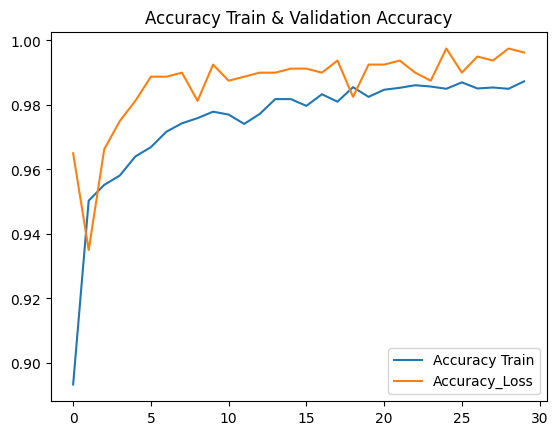

In [17]:
plt.plot(hist['accuracy'],label='Accuracy Train')
plt.plot(hist['val_accuracy'],label='Accuracy_Loss')
plt.title('Accuracy Train & Validation Accuracy')
plt.legend()

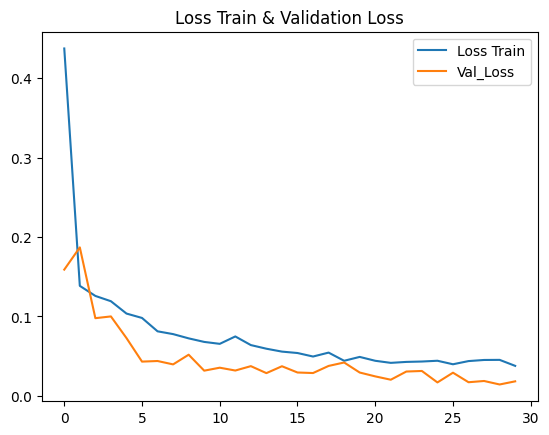

In [18]:
plt.plot(hist['loss'],label='Loss Train')
plt.plot(hist['val_loss'],label='Val_Loss')
plt.title('Loss Train & Validation Loss')
plt.legend()

In [19]:
test_loss , test_acc = model.evaluate(test_generator)
print("Test accuracy is:{} and Test loss is :{}".format(test_acc,test_loss))

31/31 [==============================] - 7s 212ms/step - loss: 0.0188 - accuracy: 0.9919
Test accuracy is:0.9919354915618896 and Test loss is :0.01876205764710903


In [26]:
prediction = model.predict(test_generator)
prediction

31/31 [==============================] - 5s 146ms/step


array([[9.99914229e-01],
       [9.99999762e-01],
       [2.81835639e-07],
       [9.99996126e-01],
       [9.99756455e-01],
       [9.11691725e-01],
       [3.37777650e-09],
       [3.77445649e-05],
       [9.99997199e-01],
       [9.99997437e-01],
       [1.54330498e-02],
       [2.54960754e-03],
       [4.61865789e-14],
       [9.99987304e-01],
       [1.84411972e-10],
       [9.98380721e-01],
       [9.94886637e-01],
       [1.71779257e-12],
       [1.00000000e+00],
       [4.12195295e-01],
       [9.99863744e-01],
       [1.42394914e-04],
       [1.92151356e-06],
       [9.99996424e-01],
       [7.35621620e-03],
       [1.87563535e-04],
       [9.99999583e-01],
       [9.99997199e-01],
       [9.99999881e-01],
       [9.99992788e-01],
       [5.73315755e-13],
       [9.98073757e-01],
       [2.43912078e-02],
       [7.18568161e-04],
       [9.99498367e-01],
       [9.99999523e-01],
       [2.79927863e-05],
       [9.99977469e-01],
       [3.00480388e-02],
       [9.83385086e-01],


In [33]:
test_mask_dir =os.path.join(test_dir, 'WithMask')
test_nomask_dir =os.path.join(test_dir, 'WithoutMask')

In [34]:
test_mask_names = os.listdir(test_mask_dir)
print(train_mask_names[:10])

test_nomask_names = os.listdir(test_nomask_dir)
print(test_nomask_names[:10])


['10.png', '100.png', '1004.png', '1005.png', '1006.png', '1007.png', '1008.png', '1011.png', '1012.png', '1018.png']
['1.png', '1000.png', '1001.png', '1014.png', '1015.png', '1028.png', '1029.png', '1148.png', '1149.png', '1160.png']


In [35]:
pred_label=[]
for row in prediction:
    N=np.argmax(row)
    if N==1:
        pred_label.append('with mask')
    else:
        pred_label.append('without mask')
pd.DataFrame(pred_label,columns=['Prediction'])

,Prediction
0,without mask
1,without mask
2,without mask
3,without mask
4,without mask
...,...
987,without mask
988,without mask
989,without mask
990,without mask


In [75]:
image2 =tf.keras.utils.load_img(
    'testing_img\img_withoutmask.jpeg',
    grayscale=False,
    color_mode='rgb',
    target_size=(150,150),
    interpolation='nearest',
    keep_aspect_ratio=False
)

input_arr = tf.keras.utils.img_to_array(image2)
input_arr = np.array([input_arr])  # Convert single image to a batch.

images = np.expand_dims(image2,axis=0)
prediction = model.predict(images)
if prediction==0:
    print("mask is there")
else:
    print("no mask is there")

1/1 [==============================] - 0s 40ms/step
no mask is there


In [74]:
image2 =tf.keras.utils.load_img(
    'testing_img\img_withmask.jpeg',
    grayscale=False,
    color_mode='rgb',
    target_size=(150,150),
    interpolation='nearest',
    keep_aspect_ratio=False
)

input_arr = tf.keras.utils.img_to_array(image2)
input_arr = np.array([input_arr])  # Convert single image to a batch.

images = np.expand_dims(image2,axis=0)
prediction = model.predict(images)
if prediction==0:
    print("mask is there")
else:
    print("no mask is there")



1/1 [==============================] - 0s 56ms/step
mask is there


In [49]:
model.save('save_model.h5')